In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'decoding_four_odors_trace'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
import glob
animals = [ani[3:] for ani in glob.glob("../*")
           if
           ani != '../img' and
           ani != '../notebooks' and
          ani != '../general notebooks']
print animals

['90', '90_475', '91', '93_500', '93_580', '93_720', '93_810', 'c10m6', 'c10m6_587', 'c10m8', 'c3f3', 'c3m1', 'c3m1_725', 'c3m2', 'c3m2_645', 'dhpcg20', 'dhpcg20_200']


In [6]:
#vhpc_animals = [ani for ani in animals if ani[0]!='d']
vhpc_pre_animals = 'c3m1', 'c3m2', 'c3f3', 'c10m6','c10m8'
vhpc_post_animals = 'c3m1', 'c3m2', 'c3f3', 'c10m6','c10m8'
dhpc_animals = [ani for ani in animals if ani[0]=='d']
#print "VENTRAL:", vhpc_animals
print vhpc_pre_animals
print "DORSAL:", dhpc_animals

('c3m1', 'c3m2', 'c3f3', 'c10m6', 'c10m8')
DORSAL: ['dhpcg20', 'dhpcg20_200']


In [7]:
scores_vhpc_post = ut.load_all_animals_vars("scores", vhpc_post_animals, session='post', notebook='decoding_four_odors_trace')
scores_vhpc_pre = ut.load_all_animals_vars("scores", vhpc_pre_animals, session='pre', notebook='decoding_four_odors_trace')

scores_dhpc_post = ut.load_all_animals_vars("scores", dhpc_animals, session='post', notebook='decoding_four_odors_trace')
scores_dhpc_pre = ut.load_all_animals_vars("scores", dhpc_animals, session='pre', notebook='decoding_four_odors_trace')

Could not load: scores for dhpcg20_200 in post/decoding_four_odors_trace
Could not load: scores for dhpcg20_200 in pre/decoding_four_odors_trace


In [8]:
def func(x):
    return x.shape[1]

ncells_vhpc_post = ut.load_all_animals_vars("patterns", vhpc_post_animals, session='post', notebook='decoding_four_odors_trace',
                                            func=func)
ncells_vhpc_pre = ut.load_all_animals_vars("patterns", vhpc_pre_animals, session='pre', notebook='decoding_four_odors_trace',
                                           func=func)

ncells_dhpc_post = ut.load_all_animals_vars("patterns", dhpc_animals, session='post', notebook='decoding_four_odors_trace',
                                            func=func)
ncells_dhpc_pre = ut.load_all_animals_vars("patterns", dhpc_animals, session='pre', notebook='decoding_four_odors_trace',
                                           func=func)

Could not load: patterns for dhpcg20_200 in post/decoding_four_odors_trace
Could not load: patterns for dhpcg20_200 in pre/decoding_four_odors_trace


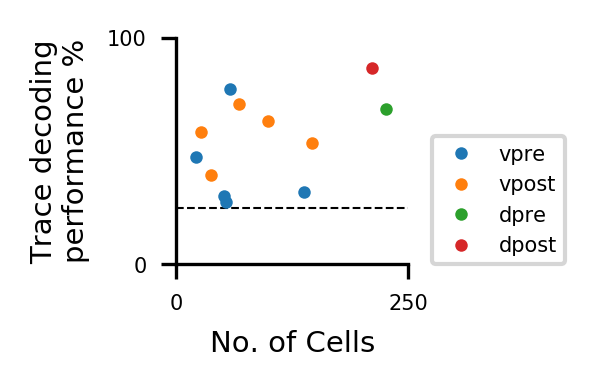

In [11]:
# vhpc_pre, vhpc_post, dhpc_pre, dhpc_post

fig, ax = pl.subplots(1, 1, figsize=(1, 1))

x = [ncells_vhpc_pre[ani] for ani in vhpc_pre_animals if ani in ncells_vhpc_pre]
y = [np.mean(scores_vhpc_pre[ani])*100 for ani in vhpc_pre_animals if ani in scores_vhpc_pre]
ax.plot(x, y, 'o', ms=3, mew=0);

x = [ncells_vhpc_post[ani] for ani in vhpc_post_animals if ani in ncells_vhpc_post]
y = [np.mean(scores_vhpc_post[ani])*100 for ani in vhpc_post_animals if ani in scores_vhpc_post]
ax.plot(x, y, 'o', ms=3, mew=0);

x = [ncells_dhpc_pre[ani] for ani in dhpc_animals if ani in ncells_dhpc_pre]
y = [np.mean(scores_dhpc_pre[ani]) *100for ani in dhpc_animals if ani in scores_dhpc_pre]
ax.plot(x, y, 'o', ms=3, mew=0);

x = [ncells_dhpc_post[ani] for ani in dhpc_animals if ani in ncells_dhpc_post]
y = [np.mean(scores_dhpc_post[ani])*100 for ani in dhpc_animals if ani in scores_dhpc_post]
ax.plot(x, y, 'o', ms=3, mew=0);

ax.set_ylim(0, 100)
ax.set_yticks((0, 100))
ax.set_xlim(0, 250)
ax.set_xticks((0, 250))
ax.set_ylabel("Trace decoding\nperformance %")
ax.set_xlabel("No. of Cells")

ax.hlines(25, 0, 250, linestyles='dashed', )
ax.legend(["vpre", "vpost", "dpre", "dpost"], loc=(1.1, 0))
